In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_train = pd.read_csv('Data/train_pos.csv')
df_test = pd.read_csv('Data/test_pos.csv')
df_val = pd.read_csv('Data/val_pos.csv')

In [3]:
X_train, y_train = df_train['lemmatized_and_pos'], df_train['target']
X_test, y_test = df_test['lemmatized_and_pos'], df_test['target']
X_val, y_val = df_val['lemmatized_and_pos'], df_val['target']

In [4]:
#best model

pipe_best_model = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   LinearSVC(penalty='l2',C=0.3,tol=1e-7,loss='squared_hinge',class_weight='balanced')),
])

In [5]:
%store -r target_name_dict
target_name_dict

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [6]:
pipe_best_model.fit(X_train,y_train)
pred_train = pipe_best_model.predict(X_train)
pred_test = pipe_best_model.predict(X_test)


In [7]:
accuracy = make_scorer(accuracy_score)

precision = make_scorer(precision_score, average='macro')
recall =  make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')
scoring={'precision':precision,'recall':recall,'f1':f1}

In [8]:
from yellowbrick.classifier import ROCAUC

In [9]:
def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        visualizer.show(outpath='confusion_matrix.png');
        return visualizer.poof()

accuracy:  0.8432
f1_score: 0.8432
precision_score: 0.8432
recall_score: 0.8432


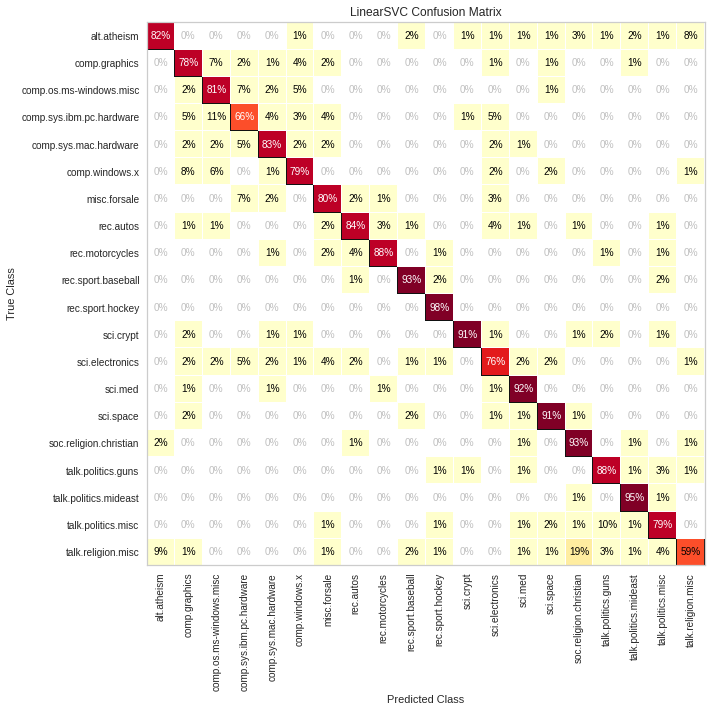

In [10]:
plt.figure(figsize=(10,10))
print("accuracy: ", round(accuracy_score(y_test,pred_test),4))
for scorer in [f1_score,precision_score,recall_score]:
    name = scorer.__name__
    print(f'{name}: {scorer(y_test, pred_test,average="micro"):.4f}')
CM(pipe_best_model,classes = [name for name in target_name_dict]);
# visualizer.show(outpath='confusion_matrix.png');

In [11]:
def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        visualizer.show(outpath='roc_curve.png');
        return visualizer.poof() 

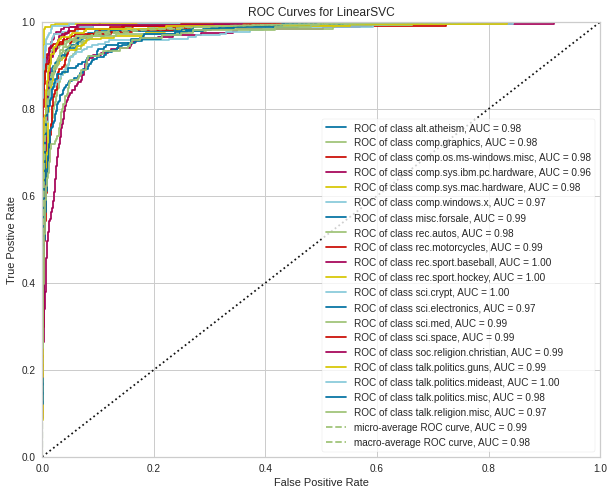

In [12]:
plt.figure(figsize=(10,8))
ROC(pipe_best_model,classes = [name for name in target_name_dict])
# visualizer.show(outpath='roc_curve.png');

In [13]:
def CR(model,classes):
        visualizer = ClassificationReport(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        visualizer.show(outpath='confusion_matrix.png');
        return visualizer.poof()

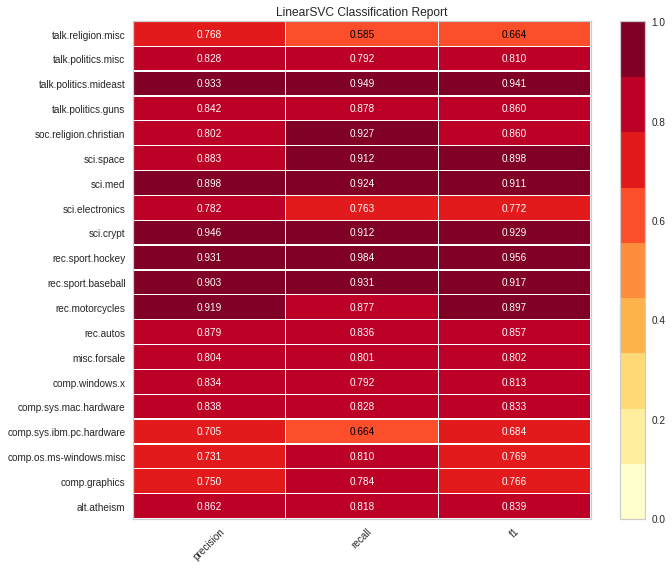

In [14]:
plt.figure(figsize=(10,8))
CR(pipe_best_model,classes = [name for name in target_name_dict])